In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import plotly.express as px
from geopy import Point, distance
from math import *
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("uber.csv")

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:

df = df.drop(["Unnamed: 0", "key"], axis=1)

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")

In [9]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,200000.0,-72.527638,11.437787,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000


In [10]:

df.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [11]:

df = df.dropna()

In [12]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    distance = []
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        distance.append(c)
    return distance

In [13]:
df["distance_km"] = distance_transform(df["pickup_longitude"].to_numpy(), df["pickup_latitude"].to_numpy(),
                                      df["dropoff_longitude"].to_numpy(), df["dropoff_latitude"].to_numpy())

In [14]:

df = df.assign(pickup_hr = df.pickup_datetime.dt.hour,
               day= df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               day_of_week = df.pickup_datetime.dt.dayofweek,
               day_name=df.pickup_datetime.dt.day_name())

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hr,day,month,year,day_of_week,day_name
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,2015,3,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,2009,4,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,2009,0,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,2009,4,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,28,8,2014,3,Thursday


In [16]:

def find_outliers(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [17]:

outliers = find_outliers(df['fare_amount'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers

number of outliers:17166
max outlier value:499.0
min outlier value:-52.0


,fare_amount
6,24.50
30,25.70
34,39.50
39,29.00
48,56.80
...,...
199976,49.70
199977,43.50
199982,57.33
199985,24.00


In [18]:

outliers = find_outliers(df['passenger_count'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers

number of outliers:22557
max outlier value:208
min outlier value:4


,passenger_count
4,5
6,5
12,5
24,5
29,5
...,...
199958,5
199959,5
199962,4
199969,5


In [19]:

df.drop(df[df['distance_km'] == 0].index, inplace = True)
df.drop(df[df['distance_km'] > 60].index, inplace = True)
df.drop(df[df['fare_amount'] > 100].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.drop(df[df['passenger_count'] > 6].index, inplace = True)

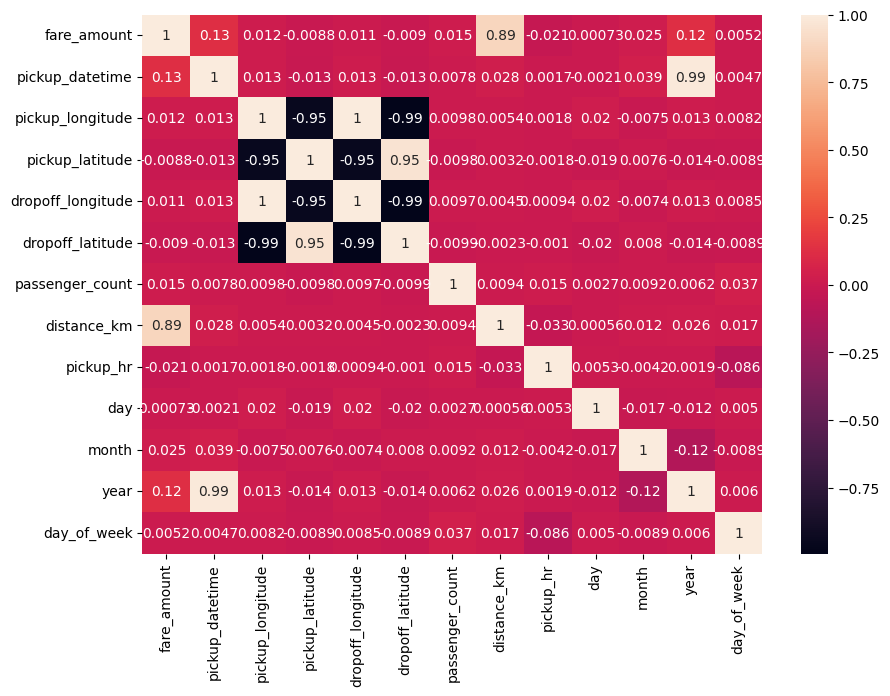

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop('day_name', axis=1).corr(), annot=True)
plt.show()

In [23]:

x = df[["year", "distance_km"]]
y = df["fare_amount"]

In [24]:
scaler = StandardScaler()


In [25]:

x = scaler.fit_transform(x)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:

y_pred = model.predict(x_test)

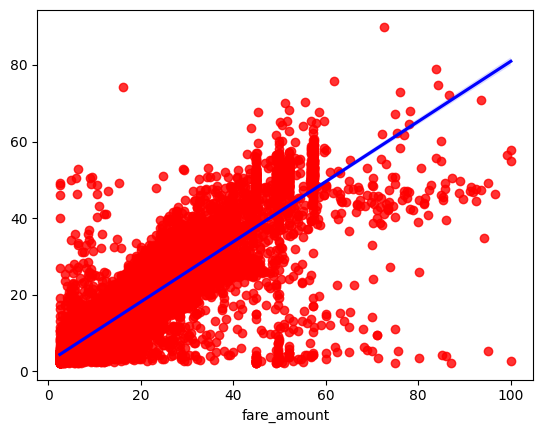

In [29]:

sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
plt.show()

In [30]:

print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean absolute error 2.243879503459476
Mean squared error 18.32381910645457
Root mean squared error 4.280633026370582


In [31]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [32]:

y_pred = model.predict(x_test)

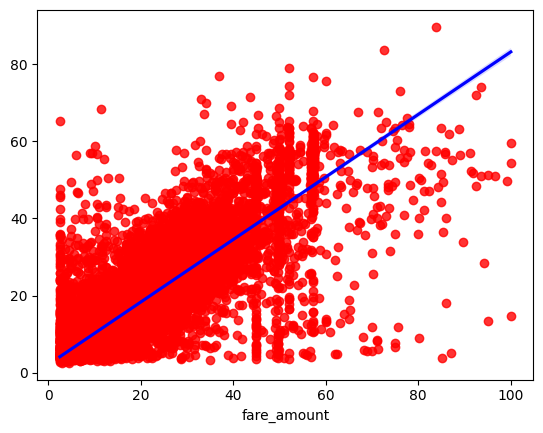

In [33]:

sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
plt.show()

In [34]:

print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean absolute error 2.5009788770385977
Mean squared error 21.318756864722953
Root mean squared error 4.6172239348685435


In [41]:
def read_data(path: str) -> pd.DataFrame:
    """
    Read data from csv file.

    Args:
        path (str): path to csv file.

    Returns:
        pd.DataFrame: dataframe of csv file.
    """
    df = pd.read_csv(path)

    return df

def basic_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Get basic information of dataframe.

    Args:
        df (pd.DataFrame): dataframe.

    Returns:
        pd.DataFrame: dataframe of basic information.
    """
    return df.info()

def distance_transform(longitude1: np.ndarray, latitude1: np.ndarray, longitude2: np.ndarray, latitude2: np.ndarray) -> list:
    """
    Calculate distance between two points.

    Args:
        longitude1 (np.ndarray): array of longitude of first point.
        latitude1 (np.ndarray): array of latitude of first point.
        longitude2 (np.ndarray): array of longitude of second point.
        latitude2 (np.ndarray): array of latitude of second point.

    Returns:
        list: list of distance between two points.
    """
    distance = []
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        distance.append(c)

    return distance

def find_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    Find outliers in dataframe.

    Args:
        df (pd.DataFrame): dataframe.

    Returns:
        pd.DataFrame: dataframe of outliers.
    """
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess dataframe.

    Args:
        df (pd.DataFrame): dataframe.

    Returns:
        pd.DataFrame: dataframe after preprocessing.
    """
    df = df.drop(["Unnamed: 0", "key"], axis=1)
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")
    df = df.dropna()
    df["distance_km"] = distance_transform(df["pickup_longitude"].to_numpy(), df["pickup_latitude"].to_numpy(),
                                      df["dropoff_longitude"].to_numpy(), df["dropoff_latitude"].to_numpy())
    df = df.assign(pickup_hr = df.pickup_datetime.dt.hour,
               day= df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               day_of_week = df.pickup_datetime.dt.dayofweek,
               day_name=df.pickup_datetime.dt.day_name())
    outliers = find_outliers(df['fare_amount'])
    print('number of outliers for fare amount:' + str(len(outliers)))
    print('max outlier value for fare amount:' + str(outliers.max()))
    print('min outlier value for fare amount:' + str(outliers.min()))
    print(outliers)
    outliers = find_outliers(df['passenger_count'])
    print('number of outliers for fare amount:' + str(len(outliers)))
    print('max outlier value for fare amount:' + str(outliers.max()))
    print('min outlier value for fare amount:' + str(outliers.min()))
    print(outliers)
    df.drop(df[df['distance_km'] == 0].index, inplace = True)
    df.drop(df[df['distance_km'] > 60].index, inplace = True)
    df.drop(df[df['fare_amount'] > 100].index, inplace = True)
    df.drop(df[df['fare_amount'] < 0].index, inplace = True)
    df.drop(df[df['passenger_count'] > 6].index, inplace = True)

    return df

def visualize_correlation(df: pd.DataFrame) -> None:
    """
    Visualize correlation between features.

    Args:
        df (pd.DataFrame): dataframe.

    Returns:
        None.
    """
    plt.figure(figsize=(10,7))
    sns.heatmap(df.drop('day_name', axis=1).corr(), annot=True)
    plt.show()

def split_data(df: pd.DataFrame) -> tuple:
    """
    Split data into train and test set.

    Args:
        df (pd.DataFrame): dataframe.

    Returns:
        tuple: tuple of train and test set.
    """
    x = df[["year", "distance_km"]]
    y = df["fare_amount"]
    scaler = StandardScaler()
    scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    return x_train, x_test, y_train, y_test

def create_model(model_name: str) -> object:
    """
    Create model.

    Args:
        model_name (str): name of model.

    Returns:
        object: model.
    """
    if model_name == "LR":
        model = LinearRegression()
    elif model_name == "RFR":
        model = RandomForestRegressor()

    return model

def train_model(model: object, x_train: np.ndarray, y_train: np.ndarray) -> None:
    """
    Train model.

    Args:
        model (object): model.
        x_train (np.ndarray): array of train set.
        y_train (np.ndarray): array of train set.

    Returns:
        None.
    """
    model.fit(x_train, y_train)

def test_model(model: object, x_test: np.ndarray) -> np.ndarray:
    """
    Test model.

    Args:
        model (object): model.
        x_test (np.ndarray): array of test set.

    Returns:
        np.ndarray: array of predicted value.
    """
    y_pred = model.predict(x_test)

    return y_pred

def reg_line(y_test: np.ndarray, y_pred: np.ndarray) -> None:
    """
    Visualize regression line.

    Args:
        y_test (np.ndarray): test value.
        y_pred (np.ndarray): predicted value.
    """
    sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
    plt.show()

def metrics_model(y_test: np.ndarray, y_pred: np.ndarray) -> None:
    """
    Calculate metrics of model.

    Args:
        y_test (np.ndarray): test value.
        y_pred (np.ndarray): predicted value.

    Returns:
        None.
    """
    print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
number of outliers for fare amount:17166
max outlier value for fare amount:499.0
min outlier value for fare amount:-52.0
6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
19

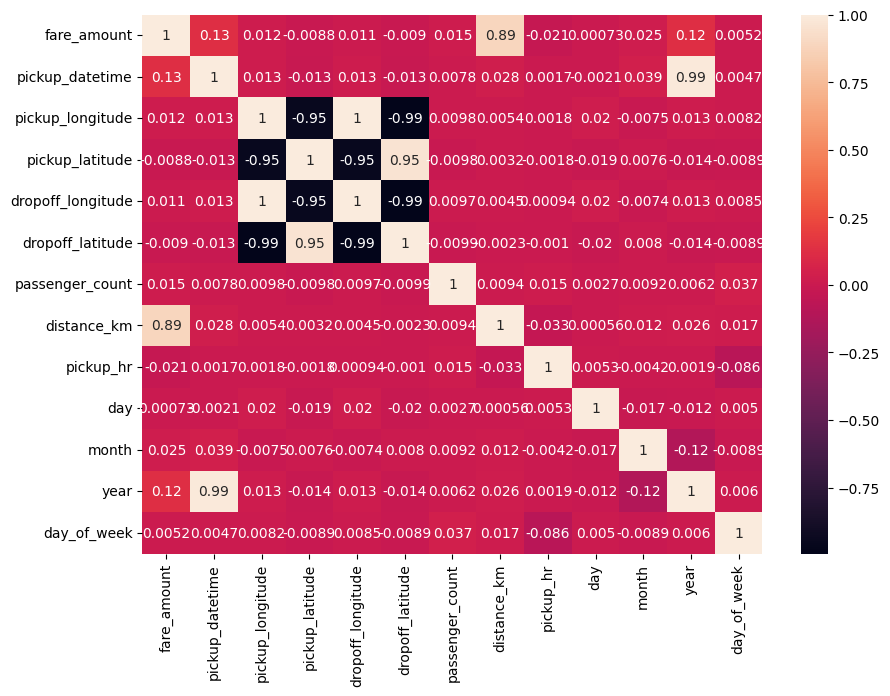


Regression Line:



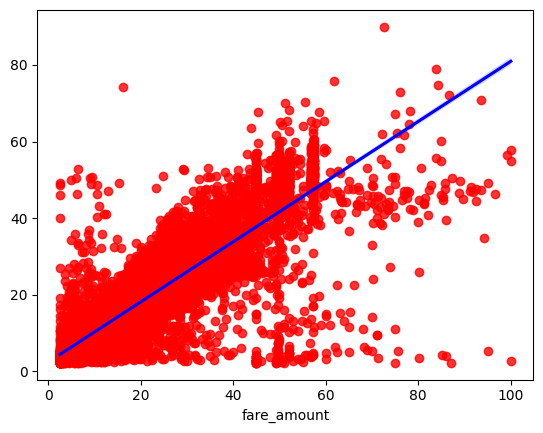


Model Metrics:

Mean absolute error 2.2438795034594645
Mean squared error 18.323819106454575
Root mean squared error 4.280633026370583


In [43]:

df = read_data("uber.csv")
print(basic_info(df))
df = preprocess(df)
print("\nCorrelation Matrix:\n")
visualize_correlation(df)
x_train, x_test, y_train, y_test = split_data(df)
model = create_model("LR")
train_model(model, x_train, y_train)
y_pred = test_model(model, x_test)
print("\nRegression Line:\n")
reg_line(y_test, y_pred)
print("\nModel Metrics:\n")
metrics_model(y_test, y_pred)